In [11]:
from siphon.catalog import TDSCatalog
import xarray as xr
import metpy
from metpy.plots import ctables
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
radar = TDSCatalog('https://thredds.ucar.edu/thredds/catalog/grib/nexrad/composite/unidata/latest.xml')
data = radar.datasets[0].remote_access(use_xarray=True)
data = data.metpy.parse_cf()

ds = data['Base_reflectivity_surface_layer'].squeeze()
plot_proj = ds.metpy.cartopy_crs
location = plot_proj.transform_point(-82.60, 30.82, ccrs.PlateCarree())
x, y = location

In [3]:
point = ds.squeeze().metpy.sel(x=x, y=y, method='nearest')
print(point.values)

20.0


In [4]:
def convert_latlon_to_xy(ds, lat, lon):
    plot_proj = ds.metpy.cartopy_crs
    location = plot_proj.transform_point(lon, lat, ccrs.PlateCarree())
    x, y = location
    return x, y

def get_grid_value(ds, x, y):
    point = ds.squeeze().metpy.sel(x=x, y=y, method='nearest')
    return point.values

pt_x, pt_y = convert_latlon_to_xy(ds, 30.82, -82.60)
value = get_grid_value(ds, pt_x, pt_y)
print(value)

20.0


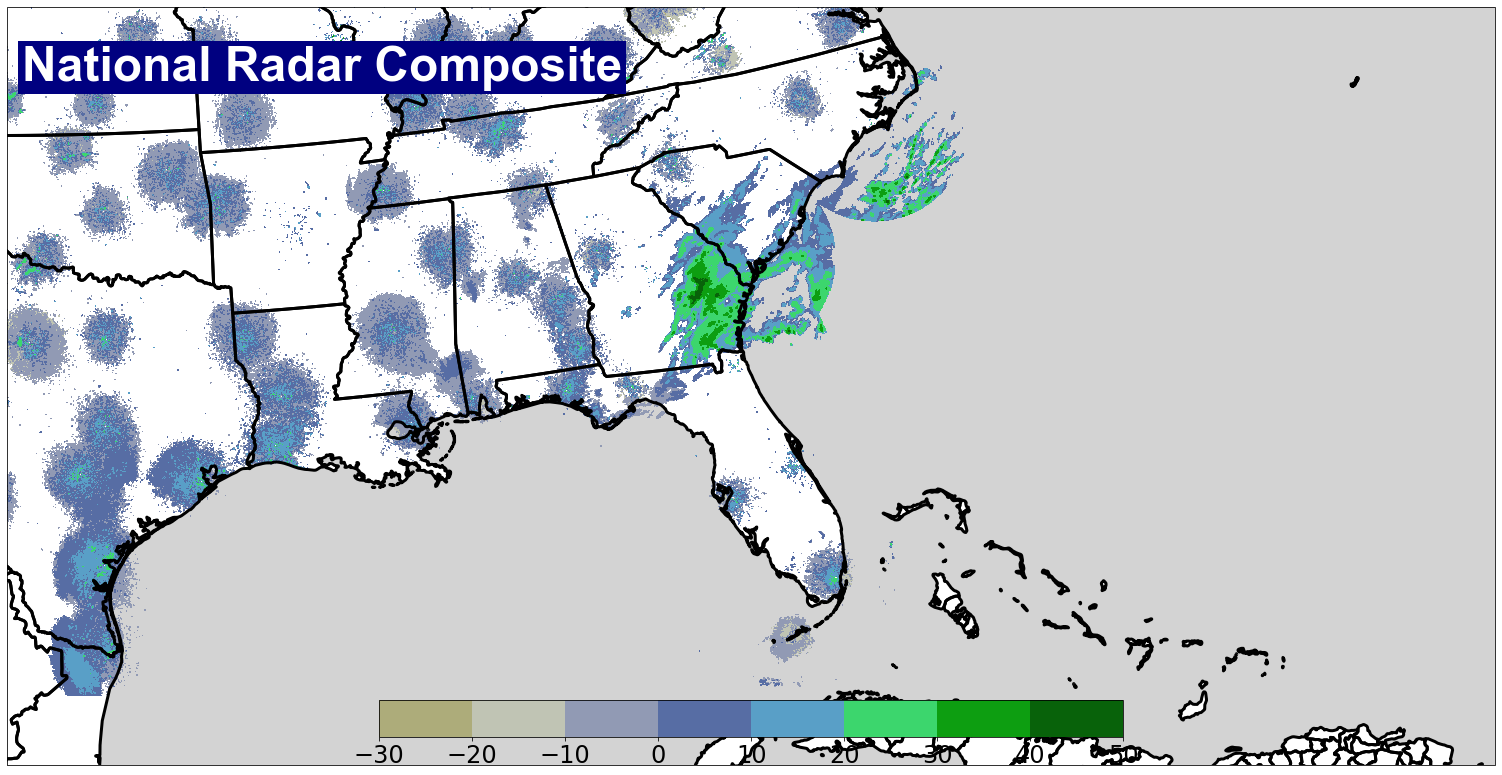

In [33]:
fig = plt.figure(figsize=(1920/72, 1080/72))
ax = fig.add_subplot(1, 1, 1, projection=plot_proj)
ax.set_extent((-89, -75, 23, 37), crs=ccrs.PlateCarree())

# Add state lines, coastlines, map extent
ax.add_feature(cfeature.OCEAN.with_scale('10m'), color='lightgray')
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=0.75)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=3.00)
ax.set_adjustable('datalim')

# Display Banner
plt.text(0.01, 0.95, s='National Radar Composite',
         fontname='Arial', fontsize=48, fontweight='bold', color='white',
         bbox={'facecolor': 'navy', 'alpha': 1.0, 'edgecolor': 'none'},
         transform=ax.transAxes, zorder=10, va='top')

norm, cmap = ctables.registry.get_with_range('NWSStormClearReflectivity', -30, 100)

contour = ax.contourf(ds.metpy.x, ds.metpy.y, ds, cmap=cmap, norm=norm, transform=plot_proj)

cbar = plt.colorbar(contour, orientation='horizontal', pad=-0.08, shrink=0.5,)
cbar.ax.tick_params(labelsize='24')